<a href="https://colab.research.google.com/github/erickm13/Tareas-Laboratorios-SP1/blob/main/Laboratorios/SP1_Laboratory_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Erick Eleazar Mejia Moscoso
Carnet: 20006104

## Preparations

In [228]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf
import tensorflow as df
# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [132]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG
'''
!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
# Retrieve the dataset
# /* YOUR CODE HERE */

--2025-02-07 02:17:27--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip’

auto+mpg.zip            [ <=>                ]  14.52K  --.-KB/s    in 0.03s   

2025-02-07 02:17:28 (498 KB/s) - ‘auto+mpg.zip’ saved [14873]



In [133]:
!unzip /content/auto+mpg.zip

Archive:  /content/auto+mpg.zip
  inflating: Index                   
  inflating: auto-mpg.data           
  inflating: auto-mpg.data-original  
  inflating: auto-mpg.names          


In [134]:
# Loading Dataset and have a glimpse about it
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset = pd.read_csv("auto-mpg.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [135]:
# Lets check columns
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin'],
      dtype='object')

In [136]:
# Summary of the dataset
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [137]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(398, 8)

In [138]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


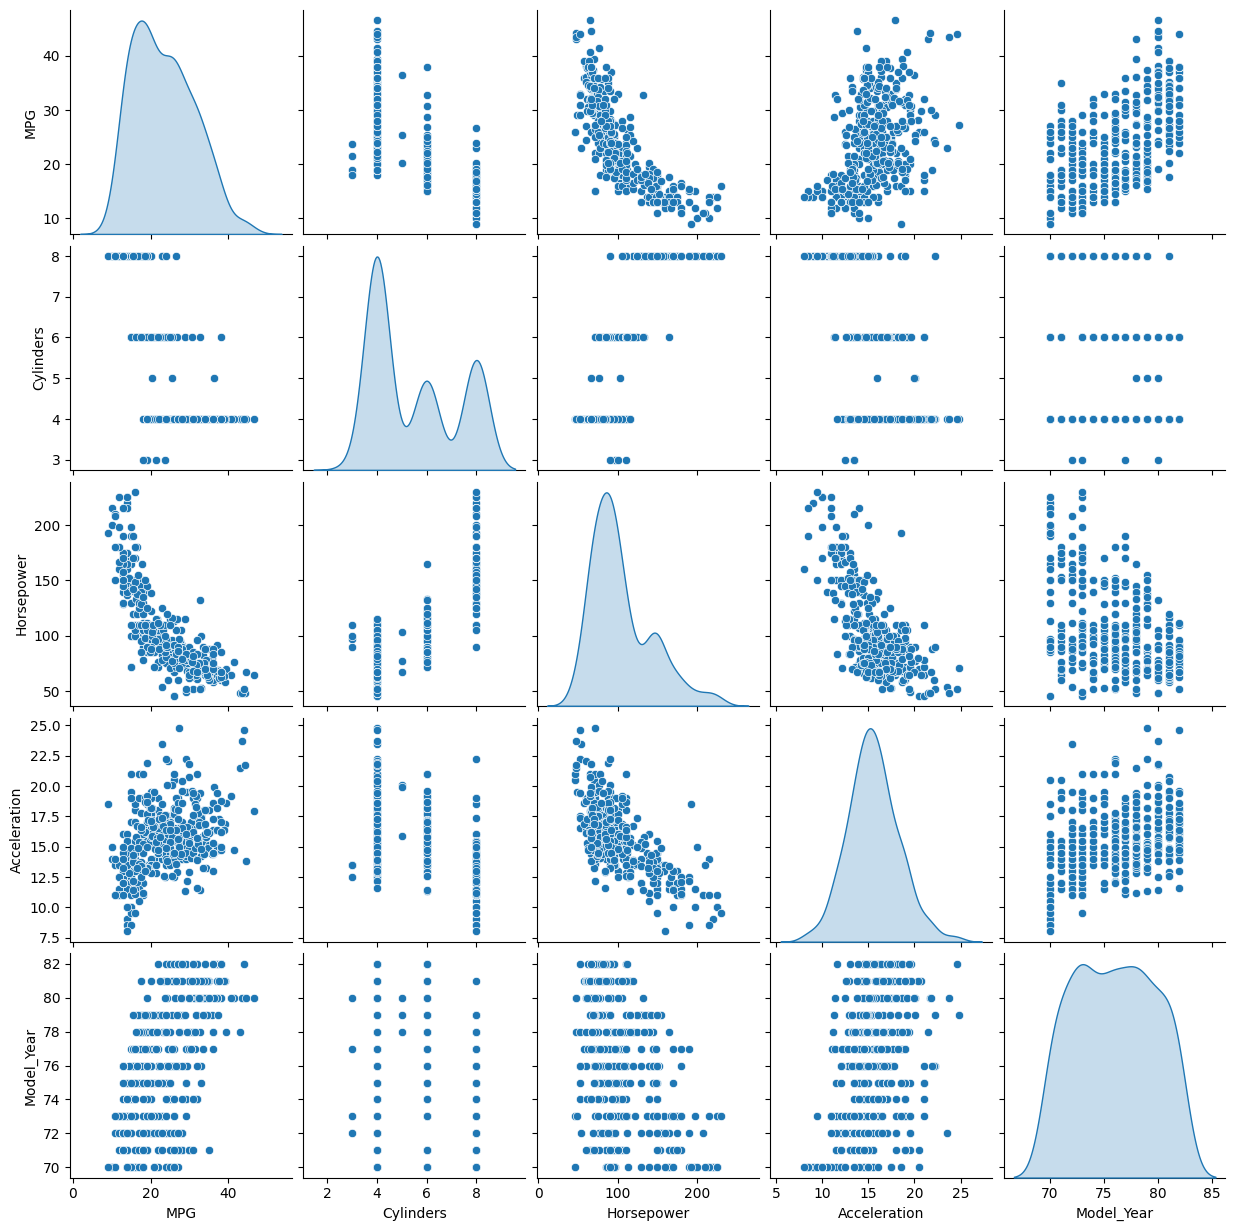

In [139]:
# Lets visualize the data
# /* YOUR CODE HERE*/
sns.pairplot(new_dataset[['MPG','Cylinders','Horsepower', 'Acceleration', 'Model_Year']], diag_kind="kde")
# Hint: Choose 5 NUMERICAL variables

## 2) NN for a simple Regression

In [141]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number of independent variables
# you want and the dependent variable is MPG
independent_variables = ['Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']
dependent_variables = ['MPG']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [165]:
# Build your model!
# /* YOUR CODE HERE */
# Lets build a simple model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'), #Colocamos 7 layers ya que tenemos 7 variables dependientes.
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),

  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'), #la ultima capa utilizamos la funcion de activacion linear, porque el dataset el manipularse con relu genera underfittring
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# Now compile the model!
# /* YOUR CODE HERE */

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [175]:
# Now lets train the model!
# Hint: Feel free to change a few parameters
model.fit(train_set,
          train_target,
          epochs=100, # utilizamos 100 para el aprandisaje de la red neuronal porque, utlizar 15 hacia que la red no aprendiera y no recorriera toda la data (muy poco tiempo)
          batch_size = 36, # la verdad no porque 36 pero jalo y si jalo no hay que tocarlo.
          validation_split=0.2
        )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.0953 - root_mean_squared_error: 4.6672 - val_loss: 20.4960 - val_root_mean_squared_error: 4.5273
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.7057 - root_mean_squared_error: 3.8214 - val_loss: 8.0577 - val_root_mean_squared_error: 2.8386
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7729 - root_mean_squared_error: 3.2770 - val_loss: 7.7795 - val_root_mean_squared_error: 2.7892
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.6795 - root_mean_squared_error: 3.9532 - val_loss: 8.1879 - val_root_mean_squared_error: 2.8614
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0161 - root_mean_squared_error: 3.3126 - val_loss: 7.9111 - val_root_mean_squared_error: 2.8127
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1955 - root_mean_squared_error: 3.0253 - val_loss: 9.1354 - val_root_mean_squared_error: 3.0225
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 

In [176]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128) #tuvimos un accurancy de 8 por lo que es un resultado muy bueno para el dataset que estamos utilizando dano por concluido el ejercicio.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.6807 - root_mean_squared_error: 2.9463


[8.680749893188477, 2.9463112354278564]

# Classification

## 1) Dataset Preparations

In [231]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Ecoli
'''
!rm /content/ecoli.data
!rm /content/ecoli.names
!rm /content/ecoli.zip

!wget https://archive.ics.uci.edu/static/public/39/ecoli.zip

!unzip /content/ecoli.zip
# Retrieve the dataset
# /* YOUR CODE HERE */

--2025-02-07 05:57:15--  https://archive.ics.uci.edu/static/public/39/ecoli.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ecoli.zip’

ecoli.zip               [ <=>                ]   5.53K  --.-KB/s    in 0s      

2025-02-07 05:57:19 (70.0 MB/s) - ‘ecoli.zip’ saved [5660]

Archive:  /content/ecoli.zip
  inflating: ecoli.data              
  inflating: ecoli.names             


In [232]:
# Loading Dataset and have a glimpse about it
column_names = ['name','MCG','GVH','LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset = pd.read_csv("ecoli.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)


# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MCG,GVH,LIP,CHG,AAC,AML1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [233]:
# Lets check columns
raw_dataset.columns

Index(['name', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class'], dtype='object')

In [234]:
# Summary of the dataset
raw_dataset.head()

,name,MCG,GVH,LIP,CHG,AAC,AML1,ALM2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [235]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(336, 9)

In [236]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

name     0
MCG      0
GVH      0
LIP      0
CHG      0
AAC      0
AML1     0
ALM2     0
class    0
dtype: int64


,name,MCG,GVH,LIP,CHG,AAC,AML1,ALM2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


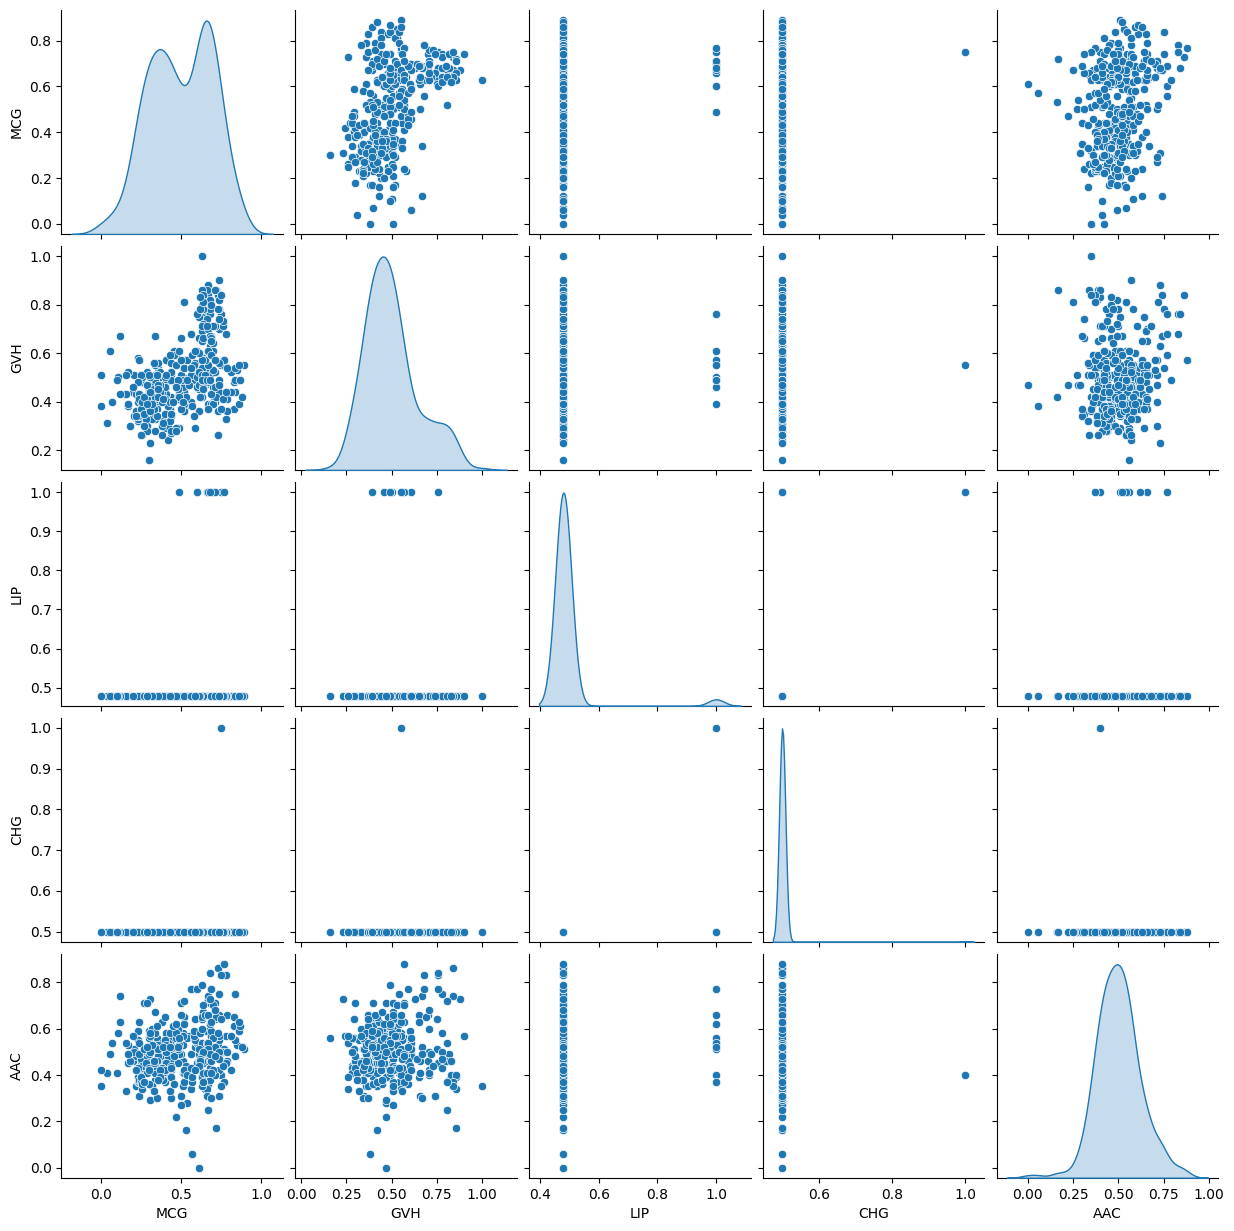

In [237]:
# Lets visualize the data
sns.pairplot(new_dataset[['MCG','GVH','LIP', 'CHG', 'AAC']], diag_kind="kde")
# /* YOUR CODE HERE*/
# Hint: Choose 5 NUMERICAL variables

In [238]:
# Splitting dataset into training and testing
new_dataset.pop('name')
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = list(new_dataset.columns)
independent_variables.remove('class')
dependent_variables = ["class"]
# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is MPG

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]
new_dataset.columns

Index(['MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class'], dtype='object')

In [239]:
train_target, test_target

(    class
 2      cp
 139    cp
 301    pp
 289    pp
 151    im
 ..    ...
 111    cp
 178    im
 195    im
 131    cp
 157    im
 
 [268 rows x 1 columns],
     class
 112    cp
 223   imL
 95     cp
 245   imU
 66     cp
 ..    ...
 149    im
 222   imL
 284    pp
 39     cp
 130    cp
 
 [68 rows x 1 columns])

In [243]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
# Factorizamos las etiquetas de 'class'
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]


In [249]:
train_target, test_target #devuelve mas de 8 clases distintas y el rango es de 0-3 segun el error que da

(array([0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0,
        2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 4, 0, 2, 0, 4, 2, 3,
        2, 0, 2, 0, 0, 0, 4, 3, 3, 0, 2, 1, 0, 1, 5, 3, 0, 0, 1, 0, 3, 0,
        0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 4, 0, 0, 3, 0, 0, 1, 0, 0, 2,
        0, 0, 4, 4, 2, 0, 3, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 3, 0,
        1, 1, 0, 1, 3, 2, 1, 0, 0, 2, 0, 0, 0, 3, 2, 4, 1, 0, 1, 3, 0, 2,
        0, 4, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 3, 0, 4, 0, 0, 1, 2, 0, 0,
        0, 0, 3, 2, 3, 2, 2, 4, 1, 0, 6, 0, 4, 2, 0, 0, 0, 4, 2, 0, 0, 0,
        1, 4, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 3, 0, 1,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 6,
        3, 0, 0, 4, 0, 0, 1, 4, 6, 1, 2, 4, 3, 2, 1, 0, 0, 2, 2, 0, 2, 0,
        0, 0, 2, 4, 2, 2, 0, 6, 0, 0, 1, 3, 0, 2, 3, 2, 0, 0, 2, 4, 2, 0,
        2, 2, 0, 2]),
 array([0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3,
        2, 2, 3,

## 2) NN for Classification

In [248]:
# Build your model!
# /* YOUR CODE HERE */
# Hint: Is this a binary or multiclassification problem?
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=25,
          batch_size = 128,
          validation_split=0.2
        )
# Now compile the model!
# /* YOUR CODE HERE */

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-248-b1167a51c2fa>", line 16, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 6 which is outside the valid range of [0, 3).  Label values: 4 4 2 3 0 0 0 0 3 3 0 0 3 0 4 0 0 2 0 0 0 2 1 1 0 0 0 0 0 0 3 0 3 2 0 4 1 3 2 0 2 2 0 0 2 0 6 0 3 0 4 3 0 1 0 4 1 0 0 1 0 2 2 0 0 0 0 0 2 2 2 1 0 3 0 0 0 0 0 2 0 0 0 4 4 3 2 0 0 0 3 4 0 0 0 0 2 0 2 2 0 0 0 2 1 0 2 1 0 0 2 2 0 1 0 2 3 0 2 0 0 3 1 0 2 0 0 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_30654]

In [59]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-59-b15c580491d2>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 92, in test_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 3).  Label values: 0 1 1 2 2 0 2 0 2 1 3 1 0 2 2 2 1 0 4 1 2 0 1 2 1 1 1 1 3 1 3 0 1 3 4 3 3 5 4 1 1 1 1 4 0 1 0 1 2 4 2 1 2 3 0 4 1 1 3 2 1 2 0 2 0 4 3 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_2061]

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Conclusiones

After you are done with both previous models, make 3 different models for the regression problem and 3 for the classification problem.

Annotate the results in a Text Cell below this one (only the metrics shown in the evaluation phase) and then write a conclusion which model was the best for each problem.

# READ ME

When you are finished with your laboratory, remember to share it. Make the URL public for Galileo.edu domain or for everyone.
Also, remember to hit Ctrl+S to save your progress.